# Problem Set 1 - MNIST Dataset

- Load MNIST and show a montage of the images.
- Run a random y=mx model on MNIST
- Train random walk model to at least 75% accuracy
- Create a markdown (.md) report and add it to your GitHub

In [141]:
%%capture
import sys

# List of libraries to be installed
libraries = ['numpy', 'matplotlib', 'torch', 'torchvision', 'scikit-image', 'wandb']

# Iterating through the list and installing each library
for library in libraries:
    !{sys.executable} -m pip install {library}

# Now you can import the libraries
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets
from skimage.util import montage
import wandb as wb
from skimage.io import imread

In [142]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float)

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float)

## Montage plot of MNIST Data

In [143]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(7, 7)
    plt.show()

def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [144]:
# Download MNIST data training and test sets 
train_set = datasets.MNIST('./data', train=True, download=True)
test_set = datasets.MNIST('./data', train=False, download=True)

In [145]:
# Create arrays for data test and training sets
X = train_set.data.numpy()
X_test = test_set.data.numpy()

# Create arrays for targets of test and training sets
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

# Set color channel to 1 (greyscale)
X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

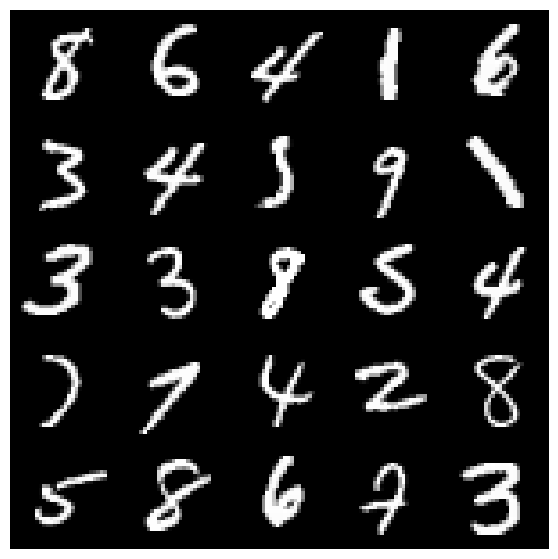

In [146]:
# Display montage of elements 125-150
montage_plot(X[125:150,0,:,:])

## Random y = mx model 

In [147]:
# Reshape train and test sets from 4D to 2D (flattening)
X = X.reshape(X.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)

In [148]:
# Return tensor for x and y of training and test sets
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [149]:
# Transpose tensor
X = X.T

In [150]:
batch_size = 64

# initialize random matrix M 
M = GPU(np.random.rand(10,784))

# create new matrix that consists of the number of images of the n set in batch_size
x = X[:,0:batch_size]

# multiply random matrix M by x
y = M@x

# replace y with indices of the max values in each column (prediction)
y = torch.argmax(y,0)

# compare predictor y with Y targets and divide by batch size to get rate of success
torch.sum((y == Y[0:batch_size]))/batch_size

tensor(0.0781)

## Train random walk model to at least 75% accuracy

In [ ]:
# Initialize constants and data
N = 100
M = GPU_data(np.random.rand(N,10,784))

# Initialize best model variables
m_best = 0
acc_best = 0

# Initialize step size for gradient ascent
step = 0.00000000001

# Main loop to iterate 1 million times
for i in range(1000000):
   
    # Compute predictions: dot product of M and X, then take argmax along axis 1
    y = torch.argmax((M@X), axis=1)
    # Compute score: number of correct predictions divided by total predictions
    score = ((y == Y).sum(1)/len(Y))
    # Sort score in descending order and sort M matrix accordingly
    s = torch.argsort(score,descending=True)
    M = M[s]

    # Zero out the last 50 rows of M, and copy the first row into the first 50 rows
    M[50:100] = 0
    M[0:50] = M[0]
    # Update all but the first row of M using gradient ascent
    M[1:] += step*GPU_data(np.random.rand(N-1,10,784))

    # Retrieve the best accuracy for this iteration
    acc = score[s][0].item()

    # Update best model and best accuracy if a better model is found
    if acc > acc_best:
        m_best = M[0]
        acc_best = acc

        # Print iteration number and best accuracy so far
        print(i,acc)